## 🔗 Workflow Overview

This TIMM-based image classification pipeline is organized into 2 modular notebooks:

1. **`TIMM_Tutorial.ipynb`**  
   Sets up the environment and trains a baseline model using a simple dataset. This is a good entry point which you can adapt to your own dataset and select a model by modifying the script accordingly.

2. **`TIMM_CustomedTrain.ipynb`**  
   Demonstrates how TIMM models can be applied to a custom image classification dataset. You can compare with TIMM_Tutorial.ipynb to verify what needs to be adjusted when fitting your own dataset and model.

➡️ Each notebook is self-contained but follows a logical order. You can run them independently after setting the correct paths and prerequisites.

# Notebook: Customized Training with TIMM

This notebook uses the **Cassava Leaf Disease** dataset, located at `../dataset/cassavaleafdata`.

**Objective:** It demonstrates how to fit customed dataset, evaluate its performance, and inference on new data.

**Dataset Background**: The Cassava Leaf Disease dataset consists of labeled images of cassava leaves affected by diseases such as **cassava mosaic disease, cassava brown streak disease**, and **bacterial blight**, along with healthy samples. It is commonly used in **agricultural AI research**, especially in the context of **automated plant disease diagnosis**. The dataset supports real-world applications like improving crop yield, reducing human diagnosis errors, and enabling rapid disease detection in developing regions where cassava is a key food source.


🔗 [License and dataset link](https://www.kaggle.com/competitions/cassava-leaf-disease-classification)

---

In [1]:
%cd ./pytorch-image-models

/home/test/carasmloo/classification/TIMM/pytorch-image-models


/home/test/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
# according to previous kaggle user experiences, seresnext is a good choice of model for this task
import timm
import torch
model_names = [m for m in timm.list_models() if 'seresnext' in m]
print(model_names)

['legacy_seresnext26_32x4d', 'legacy_seresnext50_32x4d', 'legacy_seresnext101_32x4d', 'seresnext26d_32x4d', 'seresnext26t_32x4d', 'seresnext26ts', 'seresnext50_32x4d', 'seresnext101_32x4d', 'seresnext101_32x8d', 'seresnext101_64x4d', 'seresnext101d_32x8d', 'seresnextaa101d_32x8d', 'seresnextaa201d_32x8d']


In [ ]:
%run ./train.py ../dataset/cassavaleafdata --model seresnext101d_32x8d --num-classes 5 --batch-size 16 --input-size 3 384 384 --epochs 100 --device 'cuda:0'

Training with a single process on 1 device (cuda:0).
Training with a single process on 1 device (cuda:0).
Model seresnext101d_32x8d created, param count:91549525
Model seresnext101d_32x8d created, param count:91549525
Data processing configuration for current model + dataset:
Data processing configuration for current model + dataset:
	input_size: (3, 384, 384)
	input_size: (3, 384, 384)
	interpolation: bicubic
	interpolation: bicubic
	mean: (0.485, 0.456, 0.406)
	mean: (0.485, 0.456, 0.406)
	std: (0.229, 0.224, 0.225)
	std: (0.229, 0.224, 0.225)
	crop_pct: 0.95
	crop_pct: 0.95
	crop_mode: center
	crop_mode: center
Learning rate (0.00625) calculated from base learning rate (0.1) and effective global batch size (16) with linear scaling.
Learning rate (0.00625) calculated from base learning rate (0.1) and effective global batch size (16) with linear scaling.
Created SGD (sgd) optimizer: lr: 0.00625, momentum: 0.9, dampening: 0, weight_decay: 2e-05, nesterov: True, maximize: False, foreach

In [7]:
#after training, clear cache
torch.cuda.empty_cache()
torch.cuda.synchronize()

# tutorial for more customed augmentation settings by official 
Here we try and visualize the augmentation function provided by TIMM <br>
If you are not interested, you can move on to next section

In [2]:
import torch
from timm.data.mixup import Mixup
from timm.data.dataset import ImageDataset
from timm.data.loader import create_loader

In [3]:
import torchvision
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# load dataset
def get_dataset_and_loader(mixup_args):
    mixup_fn = Mixup(**mixup_args)
    dataset = ImageDataset('./../dataset/cassavaleafdata')
    loader = create_loader(dataset,
                           input_size=(3,384,384),
                           batch_size=4,
                           is_training=True,
                           use_prefetcher=False)
    return mixup_fn, dataset, loader

In [5]:
# define preprocessing pipeline
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [6]:
# set augmentation methods, only mixup
mixup_args = {
    'mixup_alpha': 1.,
    'cutmix_alpha': 0.,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 1000}

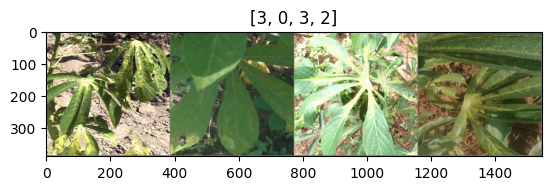

In [7]:
# run samples, without the augmentation
mixup_fn, dataset, loader = get_dataset_and_loader(mixup_args)
inputs, classes = next(iter(loader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes])

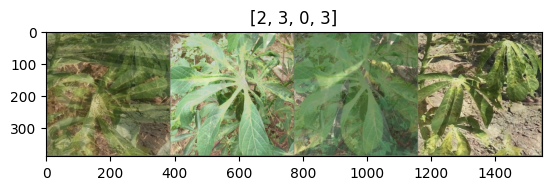

In [8]:
# run samples, with the augmentation
inputs, classes = mixup_fn(inputs, classes)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes.argmax(1)])

In [9]:
# only cutmix
mixup_args = { 
    'mixup_alpha': 0.,
    'cutmix_alpha': 1.0,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.,
    'mode': 'batch',
    'label_smoothing': 0,
    'num_classes': 1000}

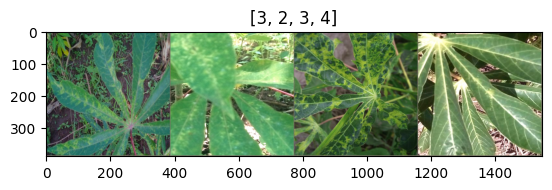

In [10]:
# run samples, without the augmentation
mixup_fn, dataset, loader = get_dataset_and_loader(mixup_args)
inputs, classes = next(iter(loader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes])

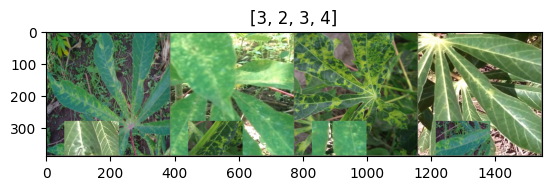

In [11]:
# run samples, with the augmentation
inputs, classes = mixup_fn(inputs, classes)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes.argmax(1)])

In [12]:
mixup_args = {
    'mixup_alpha': 0.3,
    'cutmix_alpha': 0.3,
    'cutmix_minmax': None,
    'prob': 1.0,
    'switch_prob': 0.5,
    'mode': 'elem',
    'label_smoothing': 0,
    'num_classes': 1000}

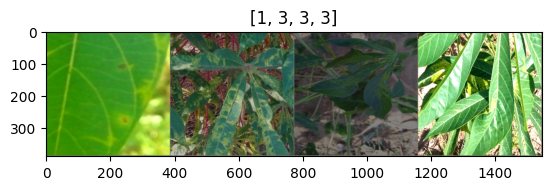

In [13]:
mixup_fn, dataset, loader = get_dataset_and_loader(mixup_args)
inputs, classes = next(iter(loader))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes])

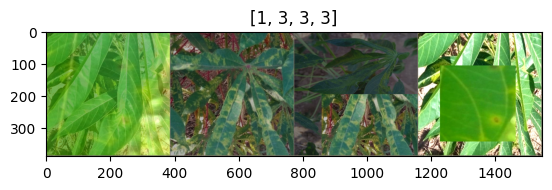

In [14]:
inputs, classes = mixup_fn(inputs, classes)
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[x.item() for x in classes.argmax(1)])

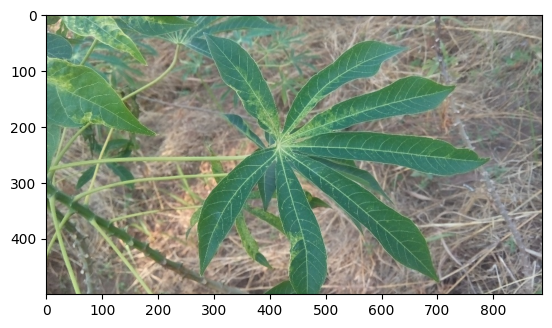

In [23]:
# see how augmentation in auto_augment be like
from timm.data.auto_augment import rand_augment_transform
from PIL import Image
from matplotlib import pyplot as plt

tfm = rand_augment_transform(
    config_str='rand-m9-mstd0.5',
    hparams={'translate_const': 117, 'img_mean': (124, 116, 104)}
)
# run sample, without the augmentation
x   = Image.open("../dataset/cassavaleafdata/train/cmd/train-cmd-3.jpg")
plt.imshow(x)

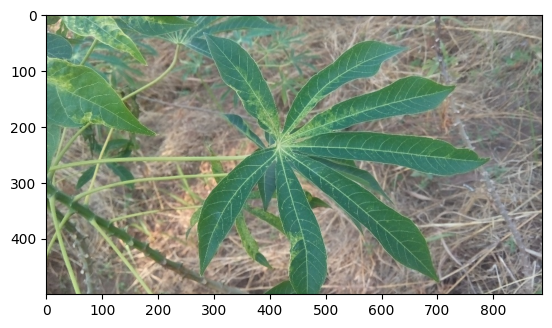

In [24]:
# run sample, with the augmentation
plt.imshow(tfm(x))

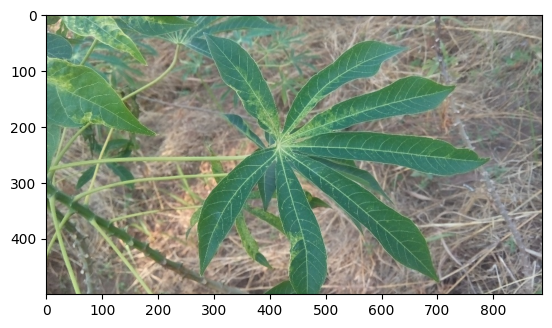

In [27]:
# see how augmentation in timm.data be like
from PIL import Image
from timm.data.random_erasing import RandomErasing
from torchvision import transforms
from matplotlib import pyplot as plt
# run sample, without the augmentation
img = Image.open("../dataset/cassavaleafdata/train/cmd/train-cmd-3.jpg")
x   = transforms.ToTensor()(img)
plt.imshow(x.permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-4.409956..4.316977].


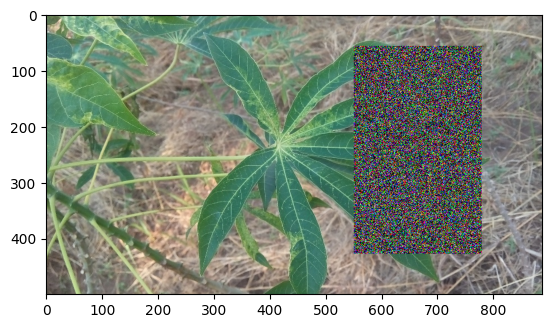

In [28]:
# run sample, with the augmentation
random_erase = RandomErasing(probability=1, mode='pixel', device='cpu')
plt.imshow(random_erase(x).permute(1, 2, 0))

# validate
#this function only provide overall accuracy, if you need accuracy of each class, go to inference and plot confusion matrix
fill in the blanks <br>
%run validate.py "your dataset location" --model "model name" --num-classes "number of object classes" --img-size "height&width" --batch-size "batch size" --checkpoint "check point location stored in ./output/train/"

In [8]:
import os
from glob import glob

def get_latest_checkpoint(base_dir="./output/train"):
    subdirs = [os.path.join(base_dir, d) for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]
    subdirs.sort(key=os.path.getmtime, reverse=True)  # Sort by Time
    for d in subdirs:
        ckpt_path = os.path.join(d, "last.pth.tar")
        if os.path.exists(ckpt_path):
            return ckpt_path
    return None

latest_ckpt = get_latest_checkpoint()
print(f"Using checkpoint: {latest_ckpt}")

Using checkpoint: ./output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar


In [9]:
%run validate.py ../dataset/cassavaleafdata\
    --model seresnext101d_32x8d \
    --num-classes 5 \
    --img-size 384 \
    --checkpoint {latest_ckpt} \
    --batch-size 16

Validating in torch.float32. AMP not enabled.
Validating in torch.float32. AMP not enabled.
Validating in torch.float32. AMP not enabled.
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Data processing configuration for current model + dataset:
Data processing configuration for current model + dataset:
Data processing configuration for current model + dataset:
	input_size: (3, 384, 384)
	input_size: (3, 384, 384)
	input_size: (3, 384, 384)
	interpolation: bicubic
	interpolation: bicubic
	interpolation: bicubic
	mean: (0.485, 0.456, 0.406)
	m

--result
{
    "model": "seresnext101d_32x8d",
    "top1": 83.5363,
    "top1_err": 16.4637,
    "top5": 100.0,
    "top5_err": 0.0,
    "param_count": 91.55,
    "img_size": 384,
    "crop_pct": 1.0,
    "interpolation": "bicubic"
}


In [10]:
# create an inference folder

%cd output
!mkdir inference
%cd ..

/home/test/carasmloo/classification/TIMM/pytorch-image-models/output
mkdir: 不能建立目錄 ‘inference’: File exists


/home/test/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/home/test/carasmloo/classification/TIMM/pytorch-image-models


# inference
fill in the blanks <br>
%run inference.py "your dataset location" --model "model name" --num-classes "number of object classes" --img-size "height&width" --batch-size "batch size" --checkpoint "check point location stored in ./output/train/" --results-dir "where you want to save results" --include-index

In [11]:
%run inference.py ../dataset/cassavaleafdata\
    --model seresnext101d_32x8d \
    --num-classes 5 \
    --img-size 384 \
    --checkpoint {latest_ckpt} \
    --batch-size 16 \
    --results-dir ./output/inference \
    --include-index

Running inference in float32. AMP not enabled.
Running inference in float32. AMP not enabled.
Running inference in float32. AMP not enabled.
Running inference in float32. AMP not enabled.
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
Model seresnext101d_32x8d created, param count: 91549525
ERROR: Cannot deduce ImageNet subset from model, no labelling will be performed.
ERROR: Cannot deduce ImageNet subset from model, no labelling w

--result
{
    "validation-cbb-0.jpg":{
        "index":0,
        "prob":0.5141519308
    },
    "validation-cbb-1.jpg":{
        "index":3,
        "prob":0.5710409284
    },
    "validation-cbb-2.jpg":{
        "index":3,
        "prob":0.5988604426
    },
    "validation-cbb-3.jpg":{
        "index":1,
        "prob":0.6135399938
    },
    "validation-cbb-4.jpg":{
        "index":1,
        "prob":0.9445059896
    },
    "validation-cbb-5.jpg":{
        "index":0,
        "prob":0.7262948155
    },
    "validation-cbb-6.jpg":{
        "index":0,
        "prob":0.4900326431
    },
    "validation-cbb-7.jpg":{
        "index":3,
        "prob":0.4891561866
    },
    "validation-cbb-8.jpg":{
        "index":1,
        "prob":0.6944744587
    },
    "validation-cbb-9.jpg":{
        "index":3,
        "prob":0.4071250558
    },
    "validation-cbb-10.jpg":{
        "index":1,
        "prob":0.756826818
    },
    "validation-cbb-11.jpg":{
        "index":0,
        "prob":0.3386777639

In [12]:
#after validation or inference, clear cache
import torch
torch.cuda.empty_cache()
torch.cuda.synchronize()

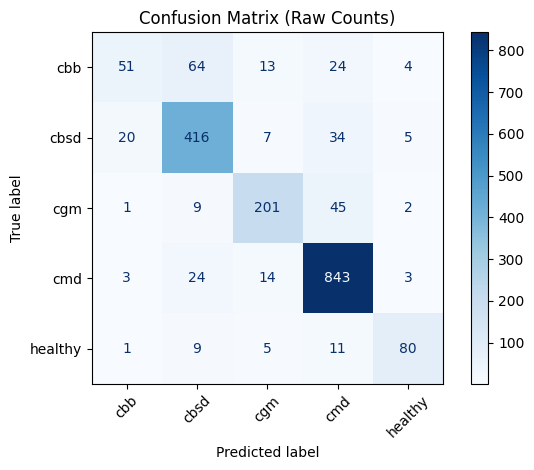

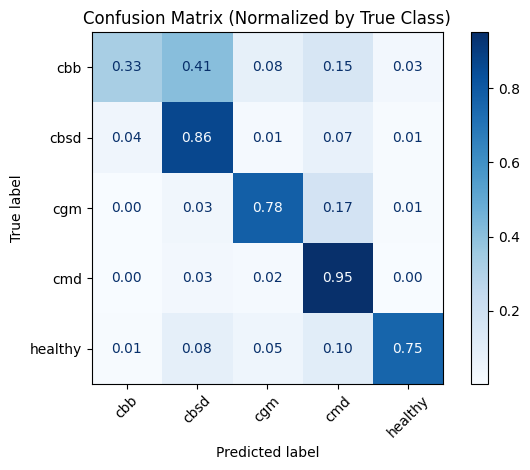

Per-class accuracy: [0.32692308 0.86307054 0.77906977 0.95039459 0.75471698]
Mean class accuracy: 0.7348


In [13]:
# plot confusion matrix
import os
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Path to the validation dataset and prediction CSV
val_dir = '../dataset/cassavaleafdata/validation'
csv_path = './output/inference/seresnext101d_32x8d-384.csv'

# Load predictions
df_pred = pd.read_csv(csv_path)

# Step 1: Get mapping of filename to ground truth label from val directory
true_labels = {}
class_names = sorted(os.listdir(val_dir))  # list of class names (sorted for consistent indexing)
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(class_names)}

for class_name in class_names:
    class_path = os.path.join(val_dir, class_name)
    for fname in os.listdir(class_path):
        true_labels[fname] = class_to_idx[class_name]

# Step 2: Map true labels to the predictions
df_pred['true'] = df_pred['filename'].map(true_labels)

# Drop rows where mapping failed
df_pred = df_pred.dropna(subset=['true'])

# Convert to int
df_pred['true'] = df_pred['true'].astype(int)
df_pred['index'] = df_pred['index'].astype(int)

# Step 3: Raw confusion matrix
y_true = df_pred['true']
y_pred = df_pred['index']

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(xticks_rotation=45, cmap='Blues')
plt.title("Confusion Matrix (Raw Counts)")
plt.tight_layout()
plt.show()

# Step 4: Normalized confusion matrix (percentage)
cm_percent = confusion_matrix(y_true, y_pred, normalize='true')
disp_percent = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=class_names)
disp_percent.plot(xticks_rotation=45, cmap='Blues', values_format=".2f") 
plt.title("Confusion Matrix (Normalized by True Class)")
plt.tight_layout()
plt.show()

# Step 5: Compute per-class accuracy
per_class_acc = cm.diagonal() / cm.sum(axis=1)

# Step 6: Compute mean (class-averaged) accuracy
mean_class_accuracy = per_class_acc.mean()

print("Per-class accuracy:", per_class_acc)
print(f"Mean class accuracy: {mean_class_accuracy:.4f}")

# Export to onnx

fill in the blanks <br>
%run onnx_export.py "name your onnx" --model "model name" --num-classes "number of object classes" --img-size "height&width" --checkpoint "check point location stored in ./output/train/"

In [14]:
%run onnx_export.py  seresnext101d_32x8d.onnx \
    --model seresnext101d_32x8d \
    --num-classes 5 \
    --img-size 384 \
    --checkpoint {latest_ckpt}

==> Creating PyTorch seresnext101d_32x8d model


Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'
Loaded state_dict from checkpoint './output/train/20250701-183523-seresnext101d_32x8d-384/model_best.pth.tar'


you can also validate with onnx <br>
fill in the blanks <br>
%run onnx_validate.py "your dataset location" --onnx-input "your onnx" --img-size "height&width" --batch-size "batch size"

In [15]:
%run onnx_validate.py ../dataset/cassavaleafdata \
    --onnx-input seresnext101d_32x8d.onnx \
    --img-size 384 \
    --batch-size 16 \
    --mean 0.485 0.456 0.406 \
    --std 0.229 0.224 0.225

Test: [0/119]	Time 1.509 (1.509, 10.605/s, 9.429 ms/sample) 	Prec@1 31.250 (31.250)	Prec@5 100.000 (100.000)
Test: [10/119]	Time 1.161 (1.194, 13.397/s, 7.464 ms/sample) 	Prec@1 81.250 (36.932)	Prec@5 100.000 (100.000)
Test: [20/119]	Time 1.164 (1.180, 13.562/s, 7.373 ms/sample) 	Prec@1 93.750 (60.119)	Prec@5 100.000 (100.000)
Test: [30/119]	Time 1.164 (1.175, 13.619/s, 7.343 ms/sample) 	Prec@1 93.750 (68.952)	Prec@5 100.000 (100.000)
Test: [40/119]	Time 1.126 (1.169, 13.686/s, 7.307 ms/sample) 	Prec@1 81.250 (73.171)	Prec@5 100.000 (100.000)
Test: [50/119]	Time 1.127 (1.161, 13.784/s, 7.255 ms/sample) 	Prec@1 75.000 (73.407)	Prec@5 100.000 (100.000)
Test: [60/119]	Time 1.136 (1.157, 13.831/s, 7.230 ms/sample) 	Prec@1 87.500 (76.332)	Prec@5 100.000 (100.000)
Test: [70/119]	Time 1.131 (1.156, 13.841/s, 7.225 ms/sample) 	Prec@1 100.000 (79.049)	Prec@5 100.000 (100.000)
Test: [80/119]	Time 1.136 (1.153, 13.877/s, 7.206 ms/sample) 	Prec@1 93.750 (80.864)	Prec@5 100.000 (100.000)
Test: [90/

# Try an image

Predicted class: Cassava Bacterial Blight (CBB) with probability: 0.5145


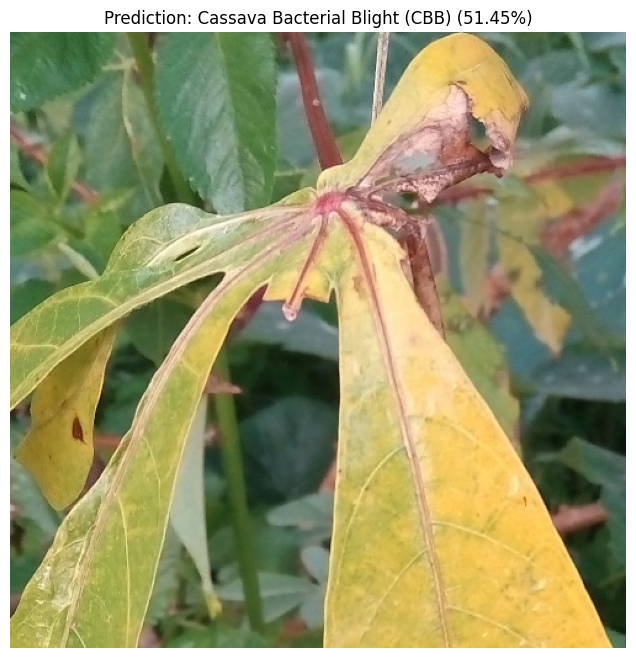

Cassava Bacterial Blight (CBB): 51.45%
Cassava Brown Streak Disease (CBSD): 31.71%
Cassava Green Mottle (CGM): 6.23%
Cassava Mosaic Disease (CMD): 7.45%
Healthy: 3.15%


In [16]:
# inference on torch
import torch
import timm
from timm.data import resolve_data_config
from timm.data.transforms_factory import create_transform
from PIL import Image
import matplotlib.pyplot as plt

# === Model configuration ===
model_name = 'seresnext101d_32x8d'
num_classes = 5
checkpoint_path = latest_ckpt

# === Create model architecture ===
model = timm.create_model(model_name, num_classes=num_classes)

# === Load checkpoint safely (set weights_only=False for PyTorch >= 2.6) ===
checkpoint = torch.load(checkpoint_path, map_location='cpu', weights_only=False)

# Extract state_dict (either from wrapped checkpoint or direct)
state_dict = checkpoint.get('state_dict', checkpoint)
model.load_state_dict(state_dict)
model.eval()

# === Image preprocessing ===
config = resolve_data_config({}, model=model)
config['input_size'] = (3, 384, 384)  # Override input size if needed
config['crop_pct'] = 0.95  # Match training crop ratio
transform = create_transform(**{**config, 'is_training': False})

# === Load and transform a single image ===
img_path = '../dataset/cassavaleafdata/validation/cbb/validation-cbb-0.jpg'
img = Image.open(img_path).convert('RGB')
tensor = transform(img).unsqueeze(0)  # Add batch dimension

# === Inference ===
with torch.no_grad():
    output = model(tensor)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

# === Interpret the prediction ===
class_names = [
    'Cassava Bacterial Blight (CBB)', 
    'Cassava Brown Streak Disease (CBSD)', 
    'Cassava Green Mottle (CGM)', 
    'Cassava Mosaic Disease (CMD)', 
    'Healthy'
]

max_prob, predicted_class = torch.max(probabilities, dim=0)
print(f"Predicted class: {class_names[predicted_class]} with probability: {max_prob.item():.4f}")

# === Display image and prediction ===
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.title(f"Prediction: {class_names[predicted_class]} ({max_prob.item():.2%})")
plt.axis('off')
plt.show()

# === Print all class probabilities ===
for i, prob in enumerate(probabilities):
    print(f"{class_names[i]}: {prob.item():.2%}")
